In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,colmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=colmap)

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

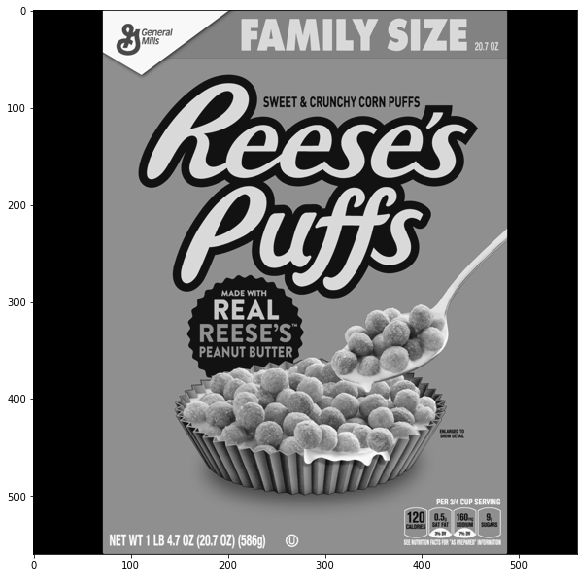

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

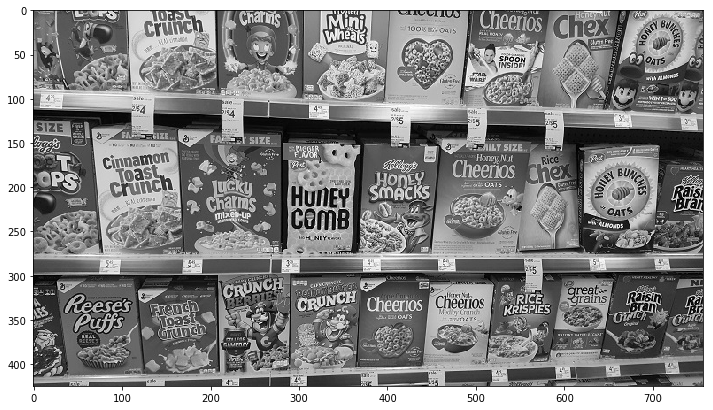

In [6]:
display(cereals)

In [7]:
# BruteForce with ORB Descriptors

In [8]:
orb = cv2.ORB_create()

In [9]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [11]:
matches = bf.match(des1,des2)

In [12]:
matches = sorted(matches, key=lambda x:x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

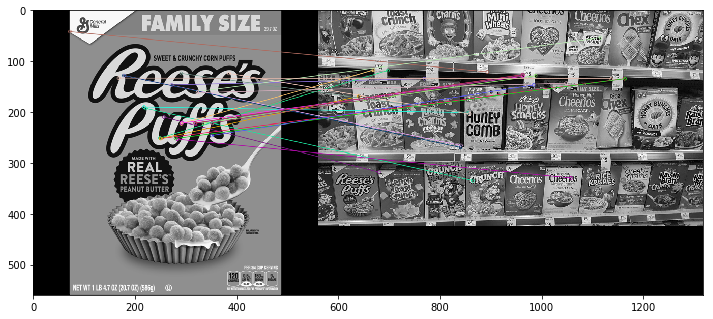

In [14]:
display(reeses_matches)

In [15]:
# Bruteforce with SIFT Descriptors

In [31]:
sift = cv2.xfeatures2d.SIFT_create()

In [32]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [33]:
bf = cv2.BFMatcher()

In [34]:
matches = bf.knnMatch(des1,des2,k=2)

In [37]:
good = []
# LESS DISTANCE == BETTER MATCH
for match1,match2 in matches:
    # IF MATCH 1 DISTANCE IS <75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, KEEP IT
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [38]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

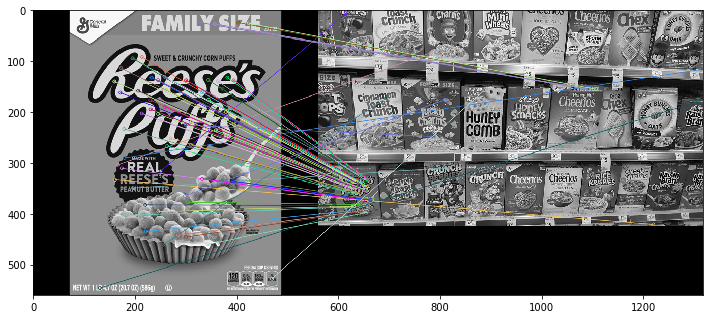

In [39]:
display(sift_matches)

In [40]:
# FLANN BASED MATCHER

In [51]:
sift = cv2.xfeatures2d.SIFT_create()

In [52]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [53]:
FLANN_NDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_NDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [54]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [55]:
matches = flann.knnMatch(des1,des2,k=2)

In [56]:
matchesMask = [[0,0] for i in range(len(matches))]

In [59]:
# LESS DISTANCE == BETTER MATCH
for i,(match1,match2) in enumerate(matches):
    # IF MATCH 1 DISTANCE IS <75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, KEEP IT
    if match1.distance < 0.75*match2.distance:
        matchesMask[i]=[1,0]

In [60]:
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask,
                   flags=0)

In [61]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

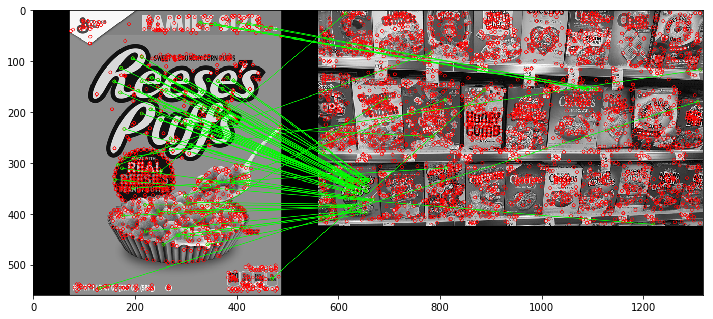

In [62]:
display(flann_matches)